# TensorFlow: Simple Regression

TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research, but the system is general enough to be applicable in a wide variety of other domains as well. [TensorFlow.org](https://www.tensorflow.org/)

In this workshop, you will become familiar with the building blocks of Tensorflow models, such as tensors, placeholders, variables, graphs, and sessions. At the end of the workshop, you will be able to create a simple regression model.

In order to install TensorFlow on your own device, please consult this [tutorial](https://www.tensorflow.org/install/).

## 1. Getting started: Constants, Graphs, Sessions

First and foremost import TensorFlow.

In [1]:
import tensorflow as tf

/Users/noelkonagai/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Check what version of TensorFlow you have installed on your computer. This workshop uses ```1.6.0```. If you have a different version of TensorFlow on your computer, you might have differences in your syntax.

In [2]:
print(tf.__version__)

1.5.0


So let's see an example of a TensorFlow computation graph. A computational graph is a series of TensorFlow operations arranged into a graph of nodes. Think of graph as a sequence of operations, nodes being the operations themselves.

In [3]:
tensor_1 = tf.constant(3.0, dtype = tf.float32)
tensor_2 = tf.constant(4.0) #the datatype of float32 is inferred in this case

We can use ```tf.add``` API to add these two tensors. Try the following.

In [4]:
tensor_3 = tf.add(tensor_1, tensor_2)
print(tensor_3)

Tensor("Add:0", shape=(), dtype=float32)


You might have expected it to print 7.0. However, each of these operations (nodes) need to be evaluated in order to display the actual value. In order to do so, we need to create a TensorFlow session. 

In [5]:
sess = tf.Session()
print(sess.run(tensor_3))

7.0


**Now you might ask, why do we need ```tf.Session()```?**

TensorFlow operates on something called **dataflow graph**. In a Dataflow Graph, each node sends and receives information. In other words, first you create the low-level architecture for your machine learning model, and only then you run through each part using local and remote computers. In this way, we can create multiple graphs, and run different graphs each time we call ```sess.run()```. We can also set session configurations, such as GPU options. You can read up on graphs and session via this [official documentation](https://www.tensorflow.org/programmers_guide/graphs) and on setting GPU and CPU options via this [article on Medium](https://medium.com/@lisulimowicz/tensorflow-cpus-and-gpus-configuration-9c223436d4ef).

## 2. Using Placeholders

Quite frequently you will use ```tf.placeholder``` instead of ```tf.constant``` because you would want to create the low-level structure of a machine learning model that you will use for training, testing, and evaluating. The structure of your model remains the same, it is just the data that gets passed through it for each of the three phases is different. We can achieve this dynamic form with the handy API of ```tf.placeholder```.

The previous code could be rewritten as:

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a + b

Here you defined two placeholders that will accept float32 values and an adder node. ```+``` is a shortcut for ```tf.add()```. Since we already have a session running we can write the following.

In [7]:
sess.run(adder_node, {a: 3.0, b: 4.0})

7.0

The second argument after ```adder_node``` is a feed dictionary. Try now creating more complex graphs. 

Hint: you can sequence your operations by making a list as follows.

In [8]:
op_1 = a + b
op_2 = a ** b
op_3 = a / b

operations = [op_1, op_2, op_3]

Now, you can also run an interactive session, where with the ```.eval()``` API call you can evaluate without having to run the session every time.

In [9]:
interactive_sess = tf.InteractiveSession() #run it only once

for op in operations:
    print(op.eval({a:3.0, b:4.0}))

7.0
81.0
0.75


To learn more about the difference between ```tf.Session()``` and ```tf.InteractiveSession()``` read [this Stackoverflow post](https://stackoverflow.com/questions/41791469/whats-the-difference-between-tf-session-and-tf-interactivesession).

## 3. Recap of Matrix Multiplication

In order to build machine learning models, more often than not you will think about your data as matrices. Let us recap matrix multiplication with ```tf.matmul()```.

Create two tensor constants with shape ```[3,3]``` and ```[3,2]```

In [10]:
a = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9], shape = [3, 3])
b = tf.constant([6, 5, 4, 3, 2, 1], shape = [3, 2])

and now multiply them

In [11]:
c = tf.matmul(a,b)
c.eval()

array([[20, 14],
       [56, 41],
       [92, 68]], dtype=int32)

**We keep talking about tensors, but what are they?**

Here is the definition given by TensorFlow itself.

> The central unit of data in TensorFlow is the tensor. A tensor consists of a set of primitive values shaped into an array of any number of dimensions. A tensor's rank is its number of dimensions. ([source](https://www.tensorflow.org/get_started/get_started))<

For the WolframAlpha definition [click here](http://mathworld.wolfram.com/Tensor.html).

Tensors are the edges between the operation nodes in the graph, that bring one output as an input to another operation. Hence the name Tensor**Flow**. Note that the rank of a Tensor is not the same as matrix rank. A scalar is a rank 0 tensor, a vector is a rank 1 tensor, a matrix (table of numbers) is a rank 2 tensor, a "3 dimensional matrix" is a rank 3 matrix. Thus an n-dimensional array would be a rank n tensor. 

```python
3 # a rank 0 tensor; a scalar with shape []
[1., 2., 3.] # a rank 1 tensor; a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]
```

You can always check the rank of the tensor with ```tf.rank(<your tensor>)```.

In [12]:
tf.rank(c)

<tf.Tensor 'Rank:0' shape=() dtype=int32>

The shape of a tensor is the number of elements in each dimension. Thus, ```[[4, 2, 3], [5, 6, 9]]``` would have a shape of [2, 3].

In [13]:
shape_tensor =  tf.Variable([[4, 2, 3], [5, 6, 9]], tf.int32)
shape_tensor.shape

TensorShape([Dimension(2), Dimension(3)])

Between operations, you may need to reshape the Tensors. Below is the code from TensorFlow's [official guide](https://www.tensorflow.org/programmers_guide/tensors) on reshaping tensors.

In [14]:
rank_three_tensor = tf.ones([3, 4, 5])
matrix = tf.reshape(rank_three_tensor, [6, 10])  # Reshape existing content into
                                                 # a 6x10 matrix
matrixB = tf.reshape(matrix, [3, -1])  #  Reshape existing content into a 3x20
                                       # matrix. -1 tells reshape to calculate
                                       # the size of this dimension.
matrixAlt = tf.reshape(matrixB, [4, 3, -1])  # Reshape existing content into a
                                             #4x3x5 tensor

Note that the number of elements of the reshaped Tensors has to match the original number of elements. Therefore, the following example generates an error because no possible value for the last dimension will match the number of elements.

In [15]:
# yet_another = tf.reshape(matrixAlt, [13, 2, -1])  # ERROR!

## 4. Simple Regression Task

Use the commands below to import the necessary libraries. If you start a new Jupyter notebook, make sure to import tensorflow as well.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's create an artificial dataset. Let's make an ```x_data``` array of random numbers between 0 and 10. Let's make a ```y_true``` value array by adding a random ```noise``` term to ```x_data + b```, where ```b``` is the intercept. This way we get a slightly noisy, more realistic dataset.

In [17]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))
b = 5

y_true = (0.5 * x_data ) + b + noise

# and now create a pandas dataframe out of it
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['x']),pd.DataFrame(data=y_true,columns=['y'])],axis=1)

Plotting it out you will get something like this.

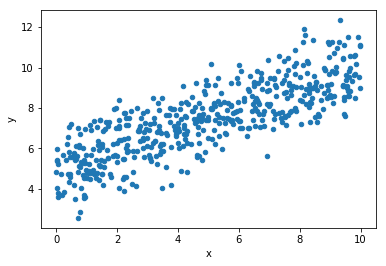

In [18]:
my_data.sample(n=500).plot(kind='scatter',x='x',y='y')

Let us set up the building blocks of our simple regression model.

First, let's initialize the variables m (slope) and b (y-intercept) at some point. This is what our Machine Learning model will adjust through learning from the loss. 

In [19]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

As discussed earlier, we will need placeholders to which we will feed in our data. We need to tell what's the size of this placeholder, which will be equal to our batch size. Let's stop here for a second and learn what is a batch size.

**Batch Size & Epoch**

When you are training a machine learning model, you are feeding in data. The number of data points that you feed into the network at a time is called the batch size. An epoch is a single pass through all the data that you have. Confused? Here is an example. Your data is of 1000 data points. To train your network, you decide to truncate the training process to take in 10 data points at a time, hence your batch size is 10. In order to complete an epoch, you will need to have 100 batches. Still confused? Watch this [video](https://www.youtube.com/watch?v=U4WB9p6ODjM) that explains more in depth what is a batch and an epoch.

In [20]:
batch_size = 10 

x_placeholder = tf.placeholder(tf.float32, [batch_size])
y_placeholder = tf.placeholder(tf.float32, [batch_size])

Then create our graph, which a simple linear regression with one variable.

In [21]:
y_model = m * x_placeholder + b

Set up a loss function from which our model will learn to adjust. We use the mean squared error (MSE) as the error metrics. It is calculated by adding the squares of the differences of the predicted values (y_model) and the actual y values (y_placeholder).

In [22]:
error = tf.reduce_sum( tf.square( y_placeholder - y_model ))

Let's set up the optimizer with a ```learning_rate``` of ```0.001``` using the following command.

In [23]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

Wait a second, we have not discussed gradient descents and learning rates. What is it exactly?

**Gradient Descent & Learning Rate**

The objective is to optimize our graph by reducing the MSE. We can do so by finding a slope ```m``` and intercept ```b``` (weights) that results in the smallest MSE. Now, we could search for it randomly, which would take a few guesses in this case, but it would take forever in case of a much more complicated graph. So we should just take the gradient of the function itself. We can compute the direction along which we should change our weights, which is in the direction of the steepest descent. Now, we should take small steps in our weight space, which can be set by the learning rate. If you take too big of a step, then you might miss the minimum which minimizes the MSE. If you take too small of a learning rate, then your training may take forever.

This was a mathematically lightweight intro to gradient descents and learning rates. If you want to learn more about optimization algorithms, you can read the following two excellent blog posts.

[Optimization](http://cs231n.github.io/optimization-1/)

[Ruder.io Gradient Descent Optimization Algorithms](http://ruder.io/optimizing-gradient-descent/index.html#batchgradientdescent)

[Siraj Raval: The Evolution of Gradient Descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)

Let us initialize our variables and our session.

In [24]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        
        feed = { x_placeholder : x_data[rand_ind], y_placeholder : y_true[rand_ind] }
        
        sess.run(train,feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

This returns ```model_m``` and ```model_b```, which are our learned ```m``` and ```b``` values.

In [25]:
print(model_m, model_b)

0.4880316 4.9489136


Plot the line using the following.

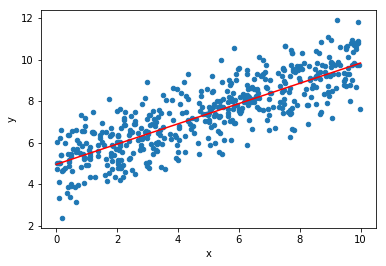

In [26]:
y_hat = x_data * model_m + model_b

my_data.sample(n=500).plot(kind='scatter',x='x',y='y')
plt.plot(x_data, y_hat,'r')

Voila! We did it. Now you ask, is TensorFlow really worth studying if a simple regression like this is this tough to achieve? I tricked you into doing this task, in order to introduce some concepts like the graph, variable, placeholder, etc. In fact, there is a much simpler API that you can use to make simple regression tasks, which is called the Estimator API. Follow along to the next workshop to find out how to use it.